In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
from sklearn.datasets import load_iris

iris=load_iris()
data=pd.DataFrame(iris.data, columns=iris.feature_names)
data['species']=iris.target
data['species']=data['species'].map({0:'Setosa', 1:'Versicolor', 2:'Virginica'})
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


c:\Users\HIMANSHU YADAV\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


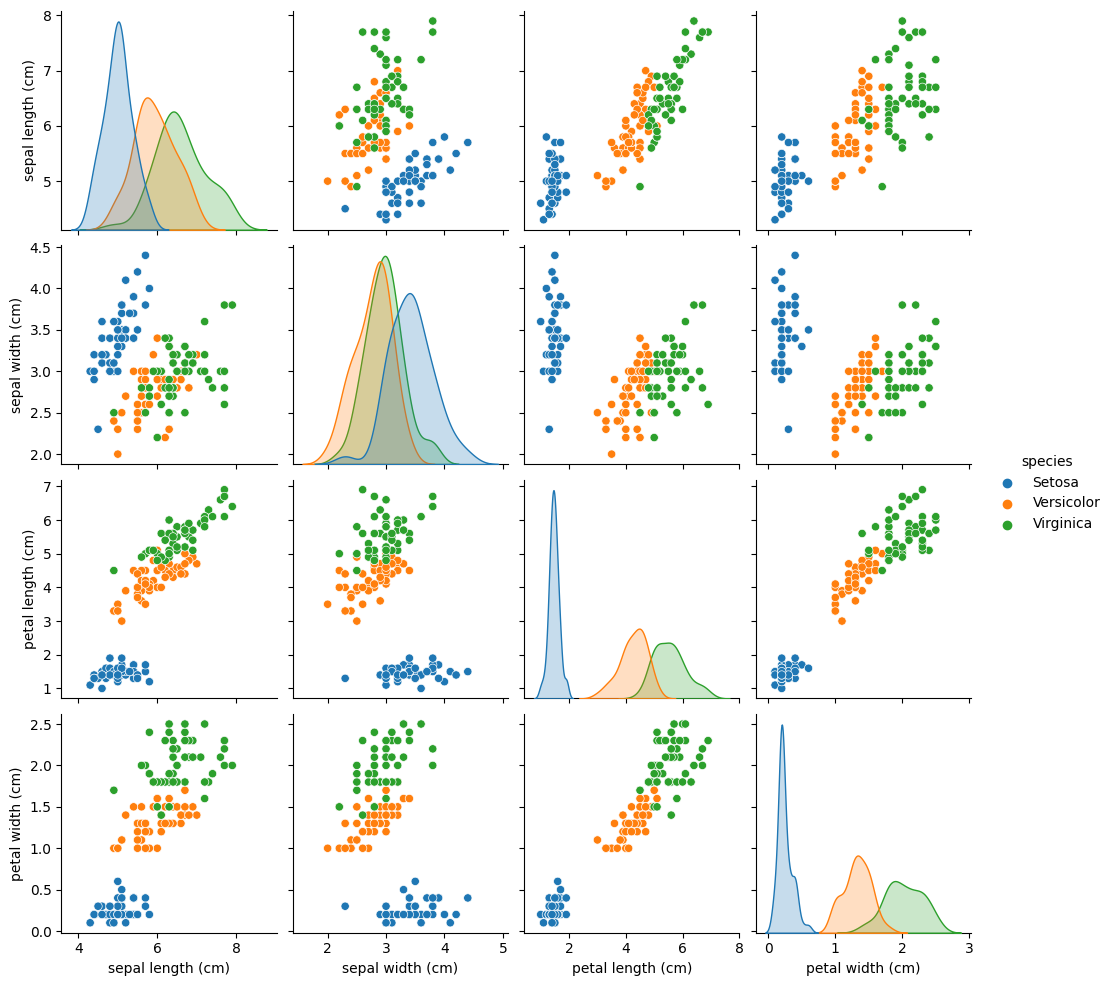

In [6]:
sns.pairplot(data, hue='species', diag_kind='kde')
plt.show()

In [7]:
x=data.iloc[:,:-1]
y=data['species']

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [9]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

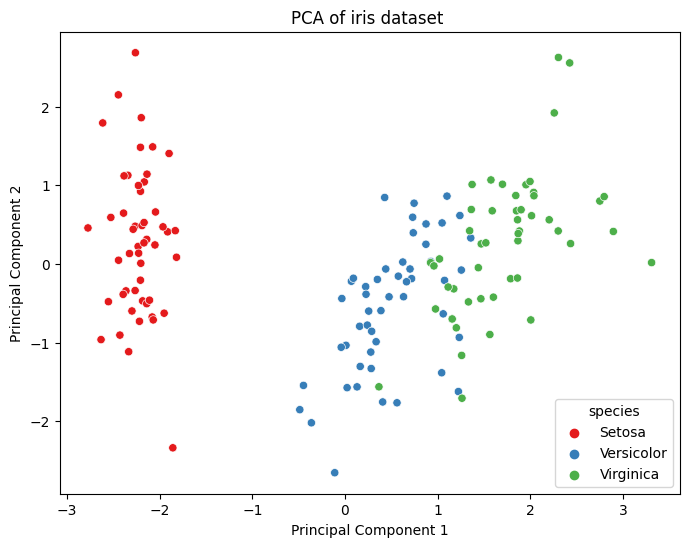

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=data['species'], palette='Set1')
plt.title("PCA of iris dataset ")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [11]:
classifier=SVC(kernel='linear', random_state=42)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [12]:
y_pred=classifier.predict(x_test)
print("classification report: ")
print(classification_report(y_test,y_pred))

print("confusion matrix: ")
print(confusion_matrix(y_test,y_pred))

classification report: 
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

confusion matrix: 
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
